In [96]:
import pandas as pd

In [97]:
df = pd.read_csv("../DataSets/institutions_with_course_name.csv",header=None)

## EDA

In [98]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,20,Vellore Institute of Technology,\N,Andhra Pradesh,Guntur,BA Public Services with Integrated MA program ...,Bachelor of Arts,B.A,Arts,Public Services with Integrated MA
1,20,Vellore Institute of Technology,\N,Andhra Pradesh,Guntur,Bachelor of Commerce (BCom) in Finance is a pr...,Bachelor of Commerce,B.Com,Commerce,Finance
2,20,Vellore Institute of Technology,\N,Andhra Pradesh,Guntur,B.Tech (Bachelor of Technology) program in Com...,Bachelor of Technology,B.Tech,Engineering,Computer Science and Engineering (Business Sys...
3,20,Vellore Institute of Technology,\N,Andhra Pradesh,Guntur,Bachelor of Technology (B.Tech) in Computer Sc...,Bachelor of Technology,B.Tech,Engineering,Computer Science and Engineering
4,20,Vellore Institute of Technology,\N,Andhra Pradesh,Guntur,B.Tech in Computer Science and Engineering (Sp...,Bachelor of Technology,B.Tech,Engineering,Computer Science and Engineering (Specializati...


In [99]:
df.columns = ["id","institution_name","institution_type","state","district","course_description","degree_description","degree_name","stream_name","course_name"]

In [100]:
df.head()

,id,institution_name,institution_type,state,district,course_description,degree_description,degree_name,stream_name,course_name
0,20,Vellore Institute of Technology,\N,Andhra Pradesh,Guntur,BA Public Services with Integrated MA program ...,Bachelor of Arts,B.A,Arts,Public Services with Integrated MA
1,20,Vellore Institute of Technology,\N,Andhra Pradesh,Guntur,Bachelor of Commerce (BCom) in Finance is a pr...,Bachelor of Commerce,B.Com,Commerce,Finance
2,20,Vellore Institute of Technology,\N,Andhra Pradesh,Guntur,B.Tech (Bachelor of Technology) program in Com...,Bachelor of Technology,B.Tech,Engineering,Computer Science and Engineering (Business Sys...
3,20,Vellore Institute of Technology,\N,Andhra Pradesh,Guntur,Bachelor of Technology (B.Tech) in Computer Sc...,Bachelor of Technology,B.Tech,Engineering,Computer Science and Engineering
4,20,Vellore Institute of Technology,\N,Andhra Pradesh,Guntur,B.Tech in Computer Science and Engineering (Sp...,Bachelor of Technology,B.Tech,Engineering,Computer Science and Engineering (Specializati...


In [101]:
df["institution_type"].isna().count()

np.int64(25296)

In [102]:
def get_institution_type(institution_name):
    for word in institution_name.split(" "):
        if word.lower() in ["government","indian","central"]:
            return "public"
        else:
            return "private"

In [103]:
df["institution_name"].count() - df["institution_name"].isna().count()

np.int64(0)

In [104]:
get_institution_type(input())

'private'

In [105]:
df["institution_type"] = df["institution_name"].apply(get_institution_type)

In [106]:
df.head()

,id,institution_name,institution_type,state,district,course_description,degree_description,degree_name,stream_name,course_name
0,20,Vellore Institute of Technology,private,Andhra Pradesh,Guntur,BA Public Services with Integrated MA program ...,Bachelor of Arts,B.A,Arts,Public Services with Integrated MA
1,20,Vellore Institute of Technology,private,Andhra Pradesh,Guntur,Bachelor of Commerce (BCom) in Finance is a pr...,Bachelor of Commerce,B.Com,Commerce,Finance
2,20,Vellore Institute of Technology,private,Andhra Pradesh,Guntur,B.Tech (Bachelor of Technology) program in Com...,Bachelor of Technology,B.Tech,Engineering,Computer Science and Engineering (Business Sys...
3,20,Vellore Institute of Technology,private,Andhra Pradesh,Guntur,Bachelor of Technology (B.Tech) in Computer Sc...,Bachelor of Technology,B.Tech,Engineering,Computer Science and Engineering
4,20,Vellore Institute of Technology,private,Andhra Pradesh,Guntur,B.Tech in Computer Science and Engineering (Sp...,Bachelor of Technology,B.Tech,Engineering,Computer Science and Engineering (Specializati...


In [107]:
df[df["institution_type"] == "private"].count() 



id                    23818
institution_name      23818
institution_type      23818
state                 23818
district              23818
course_description    23808
degree_description    23818
degree_name           23818
stream_name           23818
course_name           23818
dtype: int64

In [108]:
df[df["institution_type"] == "public"].count()


id                    1478
institution_name      1478
institution_type      1478
state                 1478
district              1478
course_description    1477
degree_description    1478
degree_name           1478
stream_name           1478
course_name           1478
dtype: int64

In [109]:
df["institution_name"].unique().shape


(3376,)

## visualize

In [110]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [111]:
def plot_word_cloud(series_data):
    data = " ".join(series_data)
    wordcloud = WordCloud().generate(data)
    plt.figure(figsize=(25,20))
    plt.imshow(wordcloud)


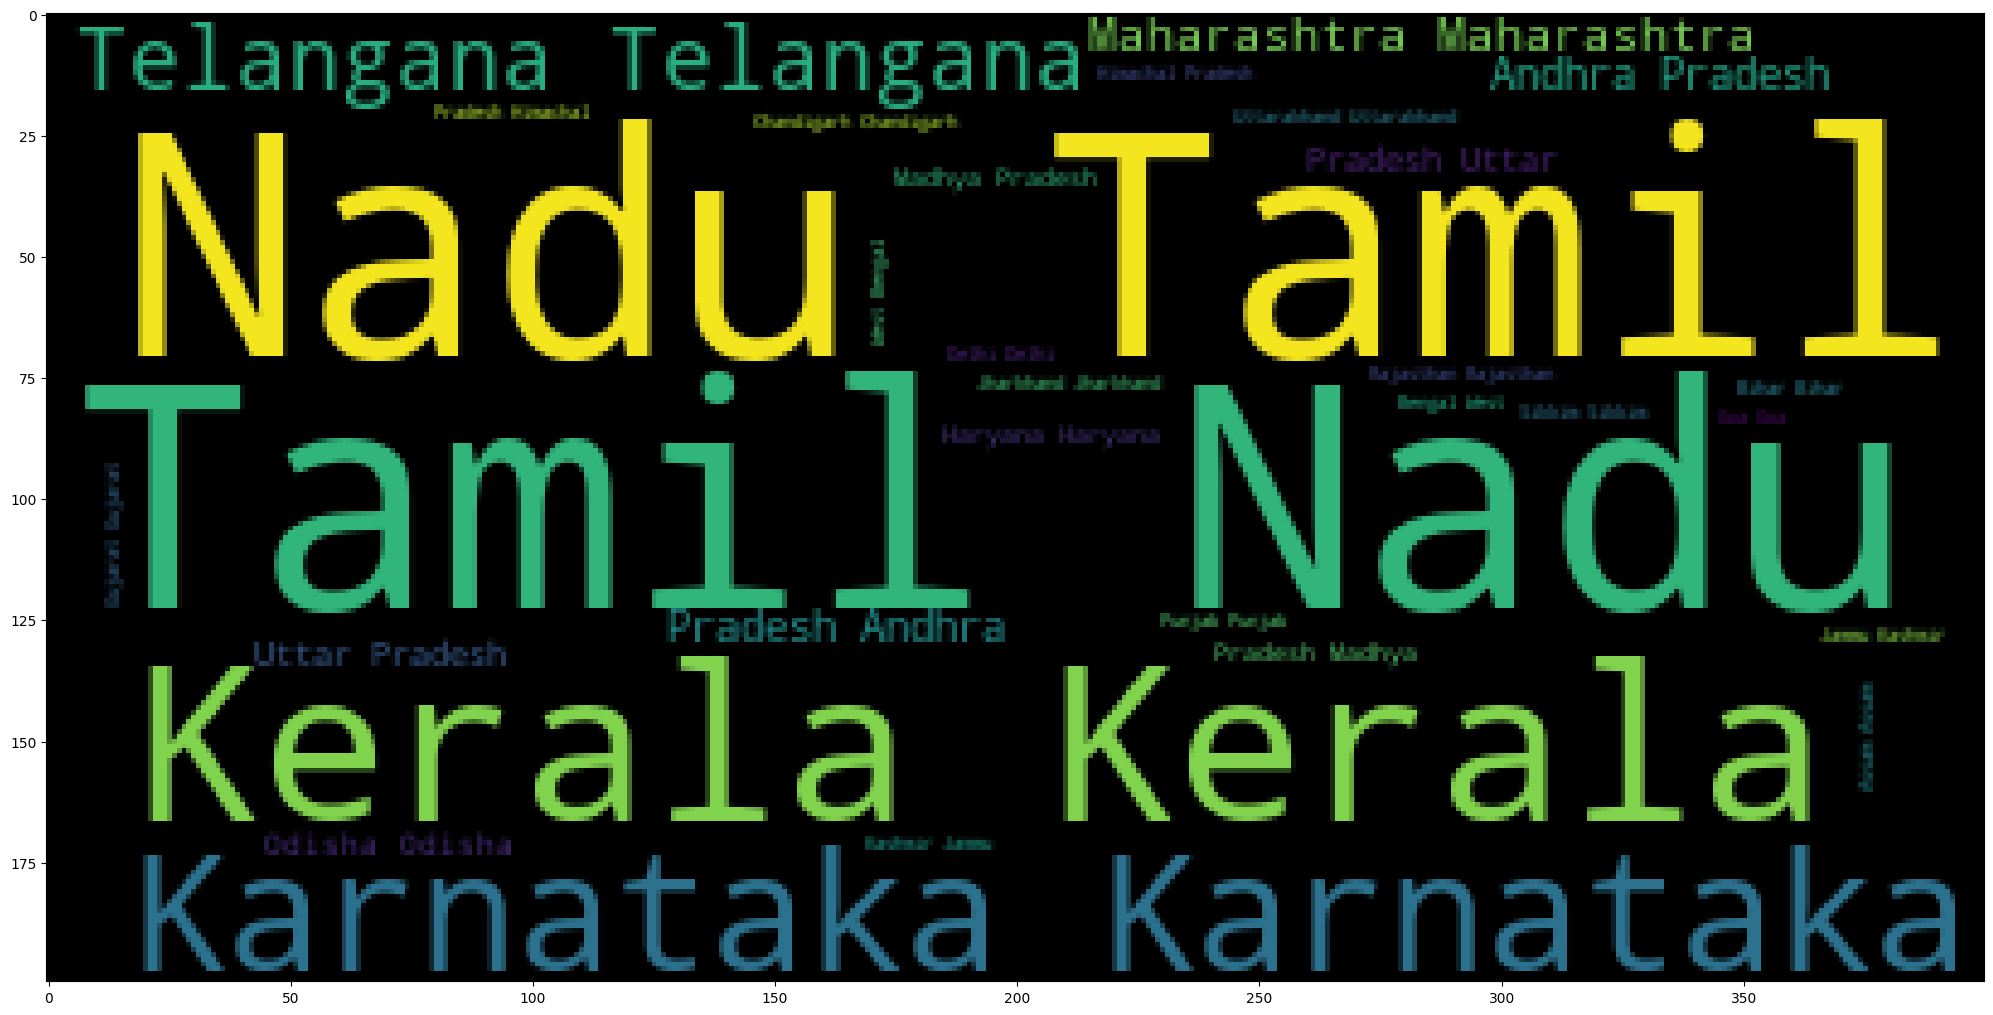

In [112]:
plot_word_cloud(df["state"])

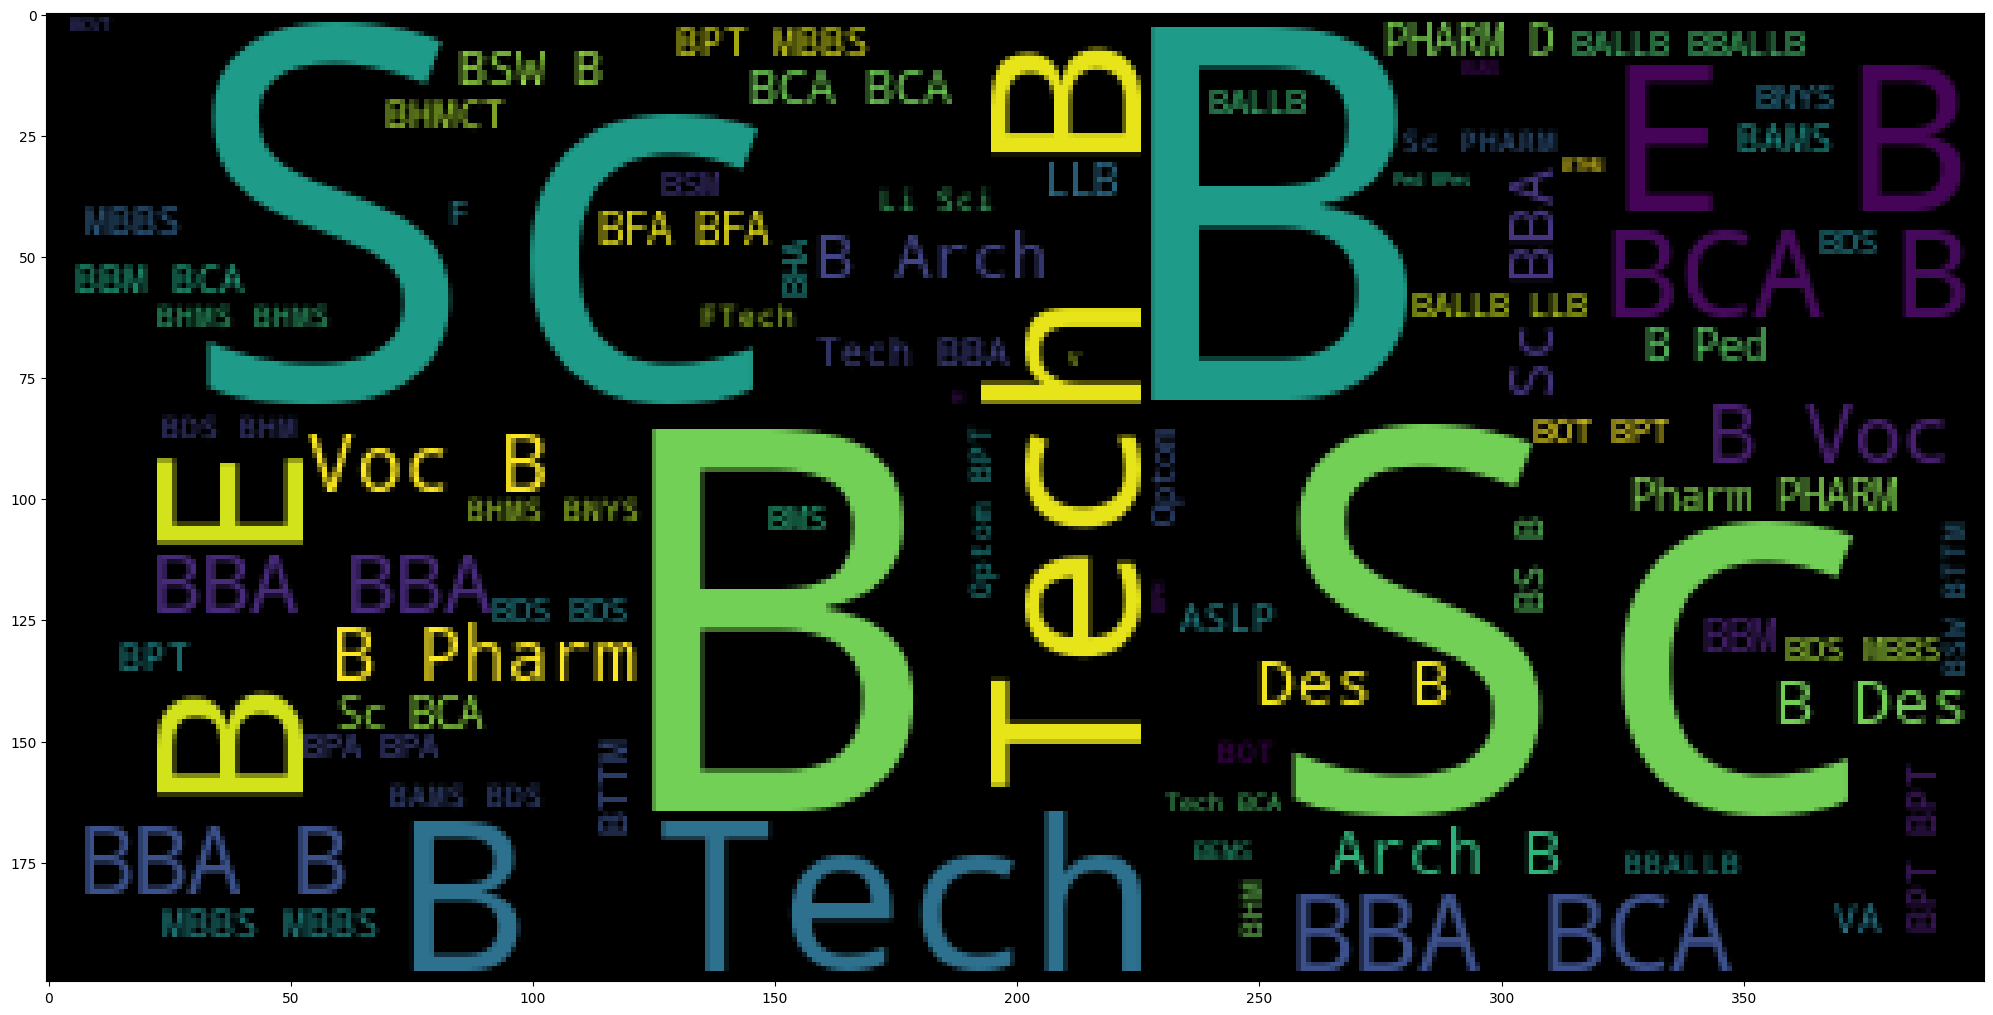

In [113]:
plot_word_cloud(df["degree_name"])

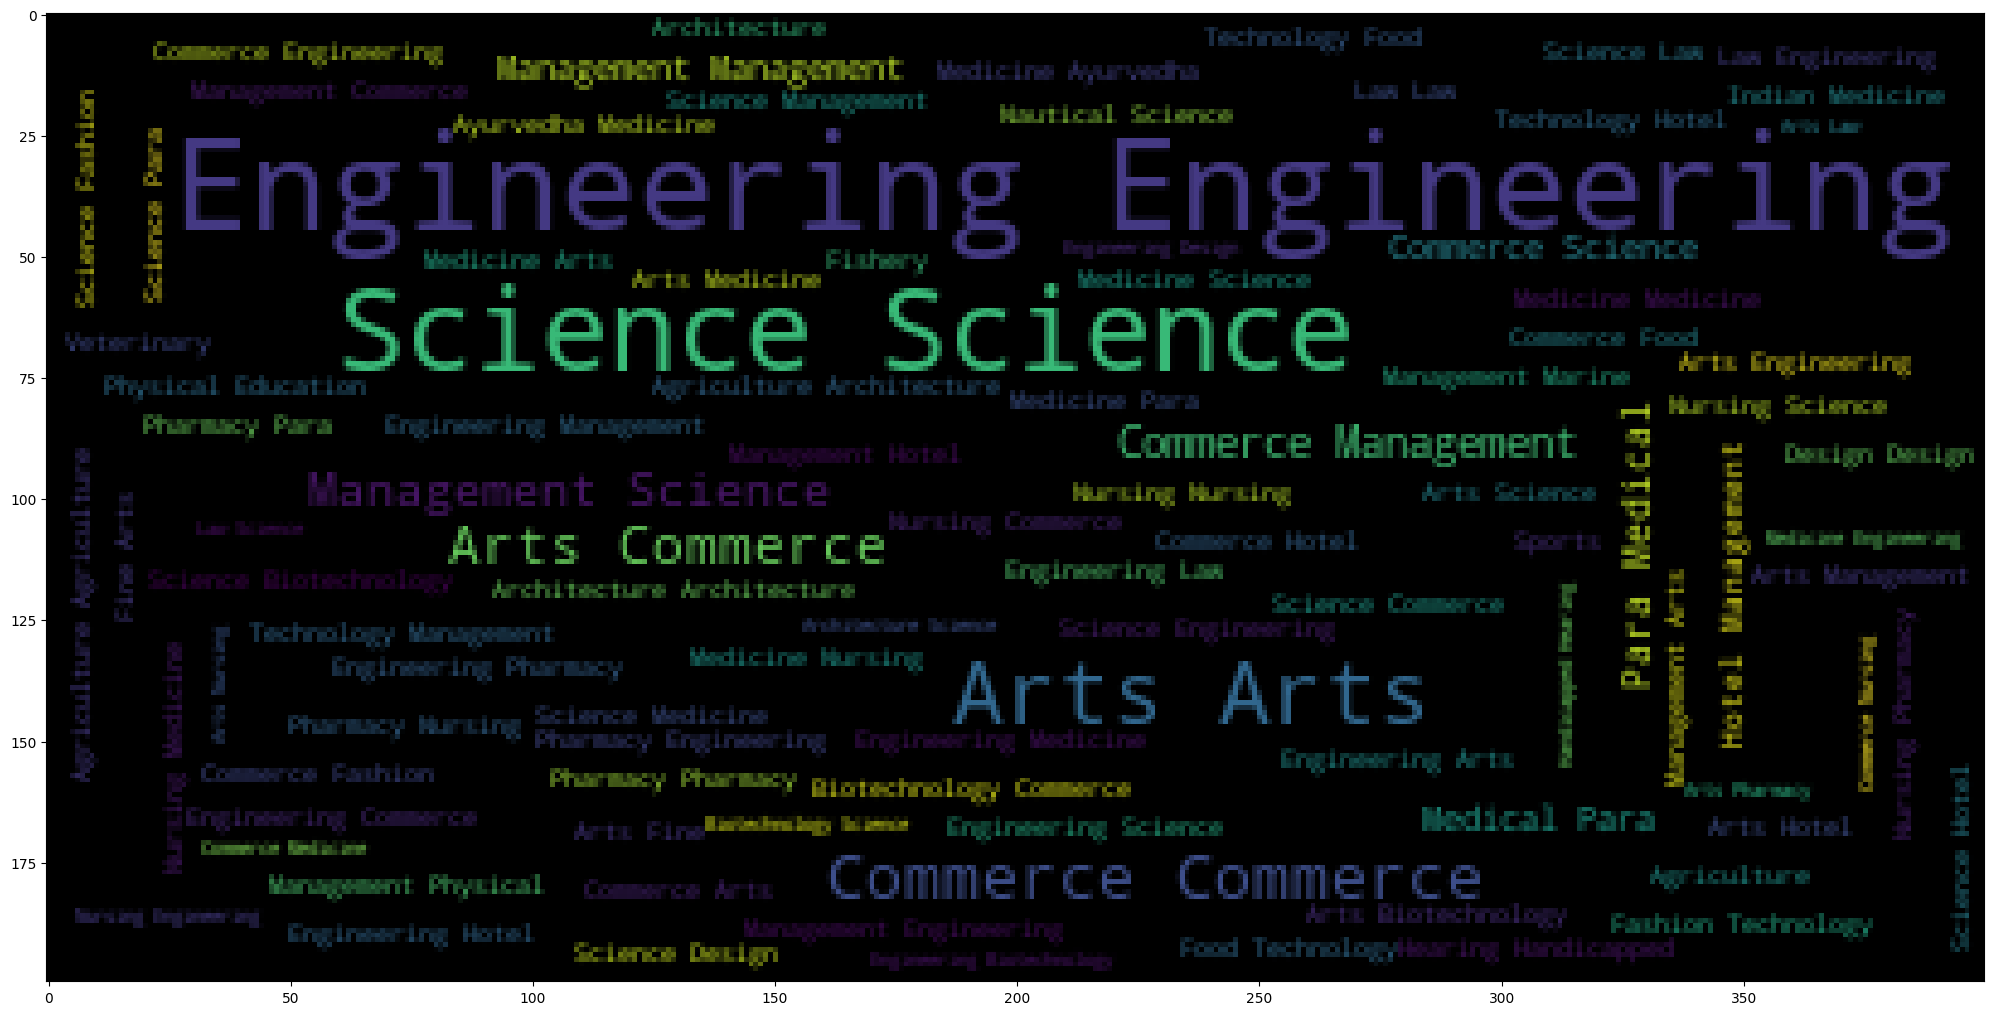

In [114]:
plot_word_cloud(df["stream_name"])


In [115]:
cd_types = df["course_description"].apply(lambda x: type(x))

In [116]:
pd.unique(cd_types)

array([<class 'str'>, <class 'float'>], dtype=object)

In [117]:
df[cd_types == "<class 'float'>"]

,id,institution_name,institution_type,state,district,course_description,degree_description,degree_name,stream_name,course_name


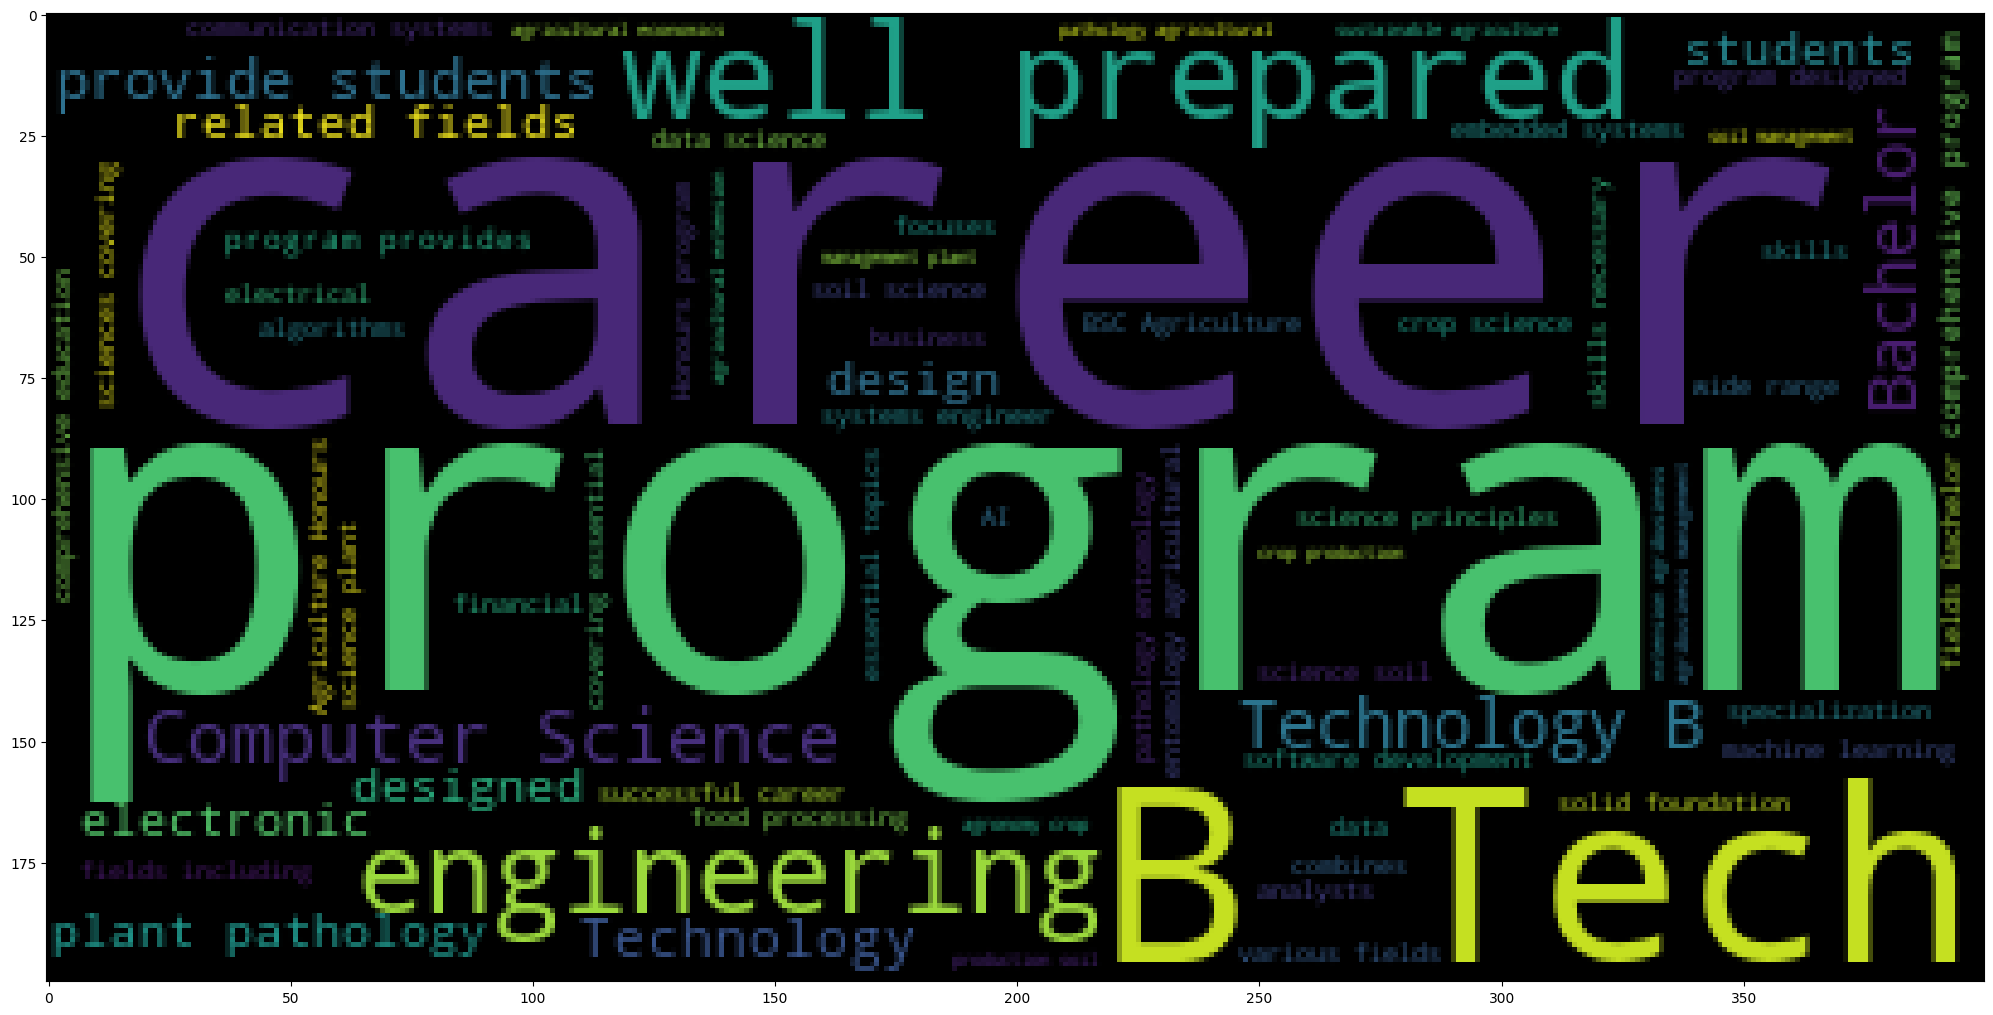

In [118]:
plot_word_cloud(df["course_description"].iloc[:100])

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25296 entries, 0 to 25295
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  25296 non-null  int64 
 1   institution_name    25296 non-null  object
 2   institution_type    25296 non-null  object
 3   state               25296 non-null  object
 4   district            25296 non-null  object
 5   course_description  25285 non-null  object
 6   degree_description  25296 non-null  object
 7   degree_name         25296 non-null  object
 8   stream_name         25296 non-null  object
 9   course_name         25296 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.9+ MB


In [120]:
df.groupby(by="institution_name")

## input


In [121]:
df.head()


,id,institution_name,institution_type,state,district,course_description,degree_description,degree_name,stream_name,course_name
0,20,Vellore Institute of Technology,private,Andhra Pradesh,Guntur,BA Public Services with Integrated MA program ...,Bachelor of Arts,B.A,Arts,Public Services with Integrated MA
1,20,Vellore Institute of Technology,private,Andhra Pradesh,Guntur,Bachelor of Commerce (BCom) in Finance is a pr...,Bachelor of Commerce,B.Com,Commerce,Finance
2,20,Vellore Institute of Technology,private,Andhra Pradesh,Guntur,B.Tech (Bachelor of Technology) program in Com...,Bachelor of Technology,B.Tech,Engineering,Computer Science and Engineering (Business Sys...
3,20,Vellore Institute of Technology,private,Andhra Pradesh,Guntur,Bachelor of Technology (B.Tech) in Computer Sc...,Bachelor of Technology,B.Tech,Engineering,Computer Science and Engineering
4,20,Vellore Institute of Technology,private,Andhra Pradesh,Guntur,B.Tech in Computer Science and Engineering (Sp...,Bachelor of Technology,B.Tech,Engineering,Computer Science and Engineering (Specializati...


In [122]:
def concat_series(series):
    return ', '.join(sorted(set(series.dropna().astype(str).str.strip())))


In [123]:
df["course_description"].isna().sum()

np.int64(11)

In [124]:
df_grouped = df.groupby(["id","institution_name"]).agg({
        "institution_type":"max",
        "state":"max",
        "district":"max",
        "course_description":concat_series,
        "degree_description":concat_series,
        "degree_name":concat_series,
        "stream_name":concat_series,
        "course_name":concat_series
    })

In [125]:
df_grouped["degree_name"].iloc[0]

'B.A, B.Com, B.Sc, BBA, BCA'

In [126]:
df_grouped.head()

,,institution_type,state,district,course_description,degree_description,degree_name,stream_name,course_name
id,institution_name,,,,,,,,
1,Annai Velakanni College For Women,private,Tamil Nadu,Chennai,Bachelor of Arts (BA) in English is a versatil...,"Bachelor of Arts, Bachelor of Business Adminis...","B.A, B.Com, B.Sc, BBA, BCA","Arts, Commerce, Management, Science","Accounting and Finance, Biochemistry, Business..."
2,Alpha Arts And Science College,private,Tamil Nadu,Chennai,Bachelor of Business Administration (BBA) in B...,"Bachelor of Business Administration, Bachelor ...","B.Com, B.Sc, BBA, BCA","Biotechnology, Commerce, Management, Science","Biotechnology, Business Administration, Comput..."
3,Agurchand Manmull Jain College,private,Tamil Nadu,Chennai,Bachelor of Arts (BA) in Criminology and Polic...,"Bachelor of Arts, Bachelor of Business Adminis...","B.A, B.Com, B.Sc, BBA, BCA","Arts, Commerce, Management, Science","Accounting and Finance, Banking Management, Bu..."
4,Anna Adarsh College For Women,private,Tamil Nadu,Chennai,B.Com (Hons) program designed to provide stude...,"Bachelor of Arts, Bachelor of Business Adminis...","B.A, B.Com, B.Sc, BBA, BCA","Arts, Commerce, Management, Science","Accounting and Finance, Banking Management, Bu..."
5,Annai Violet Arts and Science College,private,Tamil Nadu,Chennai,Bachelor of Arts (BA) in Economics offers stud...,"Bachelor of Arts, Bachelor of Business Adminis...","B.A, B.Com, B.Sc, BBA, BCA","Arts, Commerce, Management, Science","Accounting and Finance, Biochemistry, Business..."


In [127]:
df_grouped = df_grouped.reset_index()


In [128]:
df_grouped[["institution_name","degree_description","course_name"]].loc[0]

institution_name                      Annai Velakanni College For Women
degree_description    Bachelor of Arts, Bachelor of Business Adminis...
course_name           Accounting and Finance, Biochemistry, Business...
Name: 0, dtype: object

In [129]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3684 entries, 0 to 3683
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  3684 non-null   int64 
 1   institution_name    3684 non-null   object
 2   institution_type    3684 non-null   object
 3   state               3684 non-null   object
 4   district            3684 non-null   object
 5   course_description  3684 non-null   object
 6   degree_description  3684 non-null   object
 7   degree_name         3684 non-null   object
 8   stream_name         3684 non-null   object
 9   course_name         3684 non-null   object
dtypes: int64(1), object(9)
memory usage: 287.9+ KB


In [130]:
df_grouped.columns = ["id","institution_name","institution_type","state","district","all_course_descriptions","all_degree_descriptions","all_degree_names","all_stream_names","all_course_names"]

In [131]:
df_grouped.head()

,id,institution_name,institution_type,state,district,all_course_descriptions,all_degree_descriptions,all_degree_names,all_stream_names,all_course_names
0,1,Annai Velakanni College For Women,private,Tamil Nadu,Chennai,Bachelor of Arts (BA) in English is a versatil...,"Bachelor of Arts, Bachelor of Business Adminis...","B.A, B.Com, B.Sc, BBA, BCA","Arts, Commerce, Management, Science","Accounting and Finance, Biochemistry, Business..."
1,2,Alpha Arts And Science College,private,Tamil Nadu,Chennai,Bachelor of Business Administration (BBA) in B...,"Bachelor of Business Administration, Bachelor ...","B.Com, B.Sc, BBA, BCA","Biotechnology, Commerce, Management, Science","Biotechnology, Business Administration, Comput..."
2,3,Agurchand Manmull Jain College,private,Tamil Nadu,Chennai,Bachelor of Arts (BA) in Criminology and Polic...,"Bachelor of Arts, Bachelor of Business Adminis...","B.A, B.Com, B.Sc, BBA, BCA","Arts, Commerce, Management, Science","Accounting and Finance, Banking Management, Bu..."
3,4,Anna Adarsh College For Women,private,Tamil Nadu,Chennai,B.Com (Hons) program designed to provide stude...,"Bachelor of Arts, Bachelor of Business Adminis...","B.A, B.Com, B.Sc, BBA, BCA","Arts, Commerce, Management, Science","Accounting and Finance, Banking Management, Bu..."
4,5,Annai Violet Arts and Science College,private,Tamil Nadu,Chennai,Bachelor of Arts (BA) in Economics offers stud...,"Bachelor of Arts, Bachelor of Business Adminis...","B.A, B.Com, B.Sc, BBA, BCA","Arts, Commerce, Management, Science","Accounting and Finance, Biochemistry, Business..."


In [132]:
df_grouped.to_csv("../DataSets/processed/institutions_content_based_data_after_eda.csv",sep=";",header=True,index=False)